In [26]:
import keras
from keras import layers, Input, optimizers, models
from keras.applications.resnet50 import ResNet50, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
img_size = (224, 224)
BATCH_SIZE = 1
NUM_EPOCHS = 100
DATAPATCH = '2019_endoscopy_image/'
classes = ['normal', 'abnormal']

In [36]:
train_datagen = ImageDataGenerator(preprocess_input)
train_batches = train_datagen.flow_from_directory(
    directory=DATAPATCH+'train', target_size=img_size, batch_size=BATCH_SIZE, class_mode='binary', classes=classes)
test_datagen = ImageDataGenerator(preprocess_input)
valid_batches = test_datagen.flow_from_directory(
    directory=DATAPATCH+'test', target_size=img_size, batch_size=BATCH_SIZE, class_mode='binary', classes=classes)
input_tensor = Input(shape=(124, 124, 3), dtype='float32', name='input')

Found 2561 images belonging to 2 classes.
Found 450 images belonging to 2 classes.


In [37]:
from keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False,input_shape = (224, 224, 3))
print(base_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [38]:
from keras.layers import Dense, GlobalAveragePooling2D

from keras.models import Model
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(2048, activation='relu')(x)
# and a logistic layer --  we have 5 classes
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model1 = Model(inputs=base_model.input, outputs=predictions)
model1.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
                 loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
H = model1.fit_generator(train_batches,
                            steps_per_epoch = train_batches.samples // BATCH_SIZE,
                            validation_data = valid_batches,
                            validation_steps=valid_batches.samples // BATCH_SIZE,
                            epochs = NUM_EPOCHS
                            )


Epoch 1/100
2561/2561 [==============================] - 198s 77ms/step - loss: 0.4772 - acc: 0.7809 - val_loss: 0.5708 - val_acc: 0.8289
Epoch 2/100
2561/2561 [==============================] - 186s 73ms/step - loss: 0.2842 - acc: 0.8844 - val_loss: 0.4098 - val_acc: 0.8178
Epoch 3/100
2561/2561 [==============================] - 186s 73ms/step - loss: 0.1825 - acc: 0.9313 - val_loss: 0.3845 - val_acc: 0.8422
Epoch 4/100
2561/2561 [==============================] - 186s 73ms/step - loss: 0.1356 - acc: 0.9465 - val_loss: 0.3627 - val_acc: 0.8711
Epoch 5/100
2561/2561 [==============================] - 186s 73ms/step - loss: 0.1151 - acc: 0.9531 - val_loss: 0.4849 - val_acc: 0.7889
Epoch 6/100
2561/2561 [==============================] - 186s 73ms/step - loss: 0.0450 - acc: 0.9832 - val_loss: 1.0037 - val_acc: 0.6844
Epoch 7/100
2561/2561 [==============================] - 186s 73ms/step - loss: 0.0690 - acc: 0.9781 - val_loss: 0.7217 - val_acc: 0.7711
Epoch 8/100
2561/2561 [===========

2561/2561 [==============================] - 185s 72ms/step - loss: 0.0017 - acc: 0.9980 - val_loss: 0.4796 - val_acc: 0.8822
Epoch 61/100
2561/2561 [==============================] - 185s 72ms/step - loss: 0.0017 - acc: 0.9984 - val_loss: 0.5052 - val_acc: 0.8756
Epoch 62/100
2561/2561 [==============================] - 185s 72ms/step - loss: 0.0017 - acc: 0.9984 - val_loss: 0.4815 - val_acc: 0.8800
Epoch 63/100
2561/2561 [==============================] - 185s 72ms/step - loss: 0.0017 - acc: 0.9984 - val_loss: 0.4970 - val_acc: 0.8711
Epoch 64/100
2561/2561 [==============================] - 185s 72ms/step - loss: 0.0017 - acc: 0.9984 - val_loss: 0.4847 - val_acc: 0.8822
Epoch 65/100
2561/2561 [==============================] - 185s 72ms/step - loss: 0.0017 - acc: 0.9984 - val_loss: 0.4792 - val_acc: 0.8822
Epoch 66/100
2561/2561 [==============================] - 185s 72ms/step - loss: 0.0017 - acc: 0.9977 - val_loss: 0.4682 - val_acc: 0.8889
Epoch 67/100
2561/2561 [================

NameError: name 'WEIGHTS_FINAL' is not defined

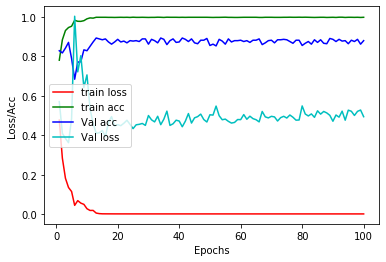

In [55]:
history = H.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['acc']
val_acc = history['val_acc']
epochs = range(1, len(loss)+1)
epochs2 = range(1,len(val_loss)+1)
plt.plot(epochs, loss, 'r', label='train loss')
plt.plot(epochs, acc, 'g', label='train acc')
plt.plot(epochs2, val_acc, 'b', label='Val acc')
plt.plot(epochs2, val_loss, 'c', label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Acc')
plt.legend()
plt.show()

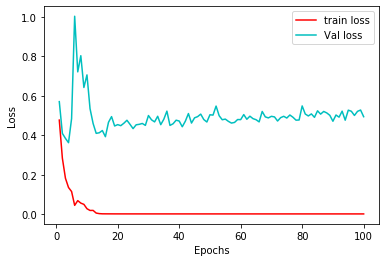

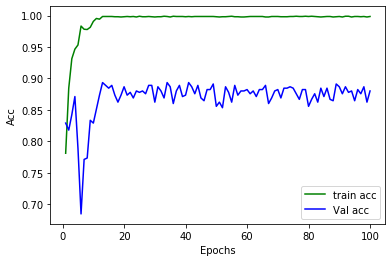

In [56]:
plt.plot(epochs, loss, 'r', label='train loss')
plt.plot(epochs2, val_loss, 'c', label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs, acc, 'g', label='train acc')
plt.plot(epochs2, val_acc, 'b', label='Val acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [65]:
test_batches = train_datagen.flow_from_directory(DATAPATCH + 'test',
                                                  target_size=img_size,
                                                  class_mode='binary',
                                                  batch_size=BATCH_SIZE,
                                                 classes= classes ,
                                                 shuffle=False)

Found 450 images belonging to 2 classes.


In [66]:
result = model1.evaluate_generator(generator=test_batches,steps = test_batches.samples)
print(result)

[0.49447862564174516, 0.88]


[9.947933131152844, 0.12]
